In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
classes_names = ["T-shirt/top", "	Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "	Sneaker", "Bag", "Ankle boot"]

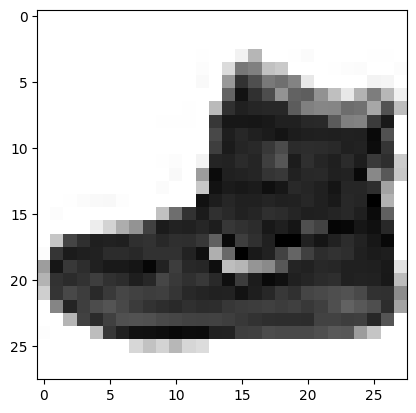

In [8]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

(-0.5, 27.5, 27.5, -0.5)

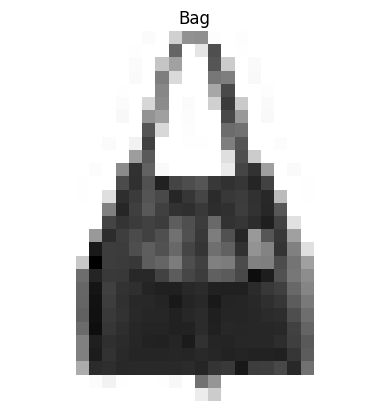

In [9]:
range_index = 59000
plt.imshow(X_train[range_index], cmap=plt.cm.binary)
plt.title(classes_names[y_train[range_index]])
plt.axis(False)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


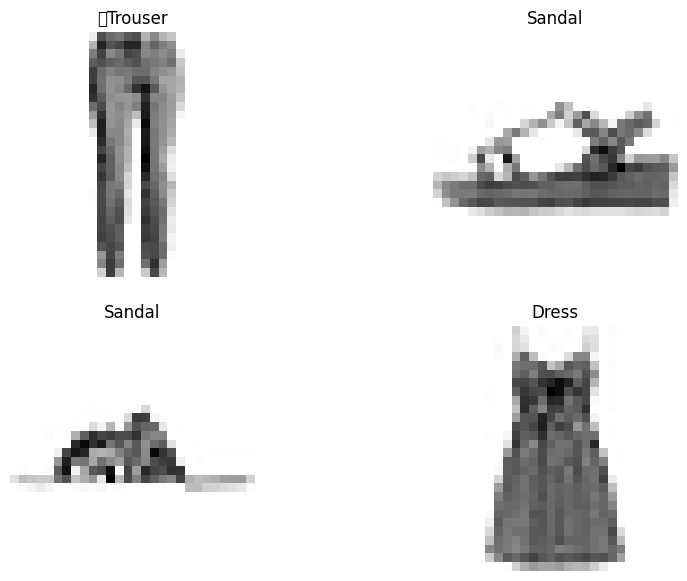

In [10]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  range_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[range_index], cmap = plt.cm.binary)
  plt.title(classes_names[y_train[range_index]])
  plt.axis(False)

In [11]:
# ** I have trained the above data with different models in separate notebook . I am showing you the best accurate model below**

In [12]:
X_train.max(), X_test.max()

(255, 255)

In [13]:
X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_train_norm.max()

1.0

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [16]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])

In [17]:
model.fit(X_train_norm, tf.one_hot(y_train, depth = 10), epochs = 10, validation_data = (X_test_norm, tf.one_hot(y_test, depth =10)))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.4998 - accuracy: 0.8190 - val_loss: 0.4178 - val_accuracy: 0.8455
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3698 - accuracy: 0.8649 - val_loss: 0.4347 - val_accuracy: 0.8481
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3361 - accuracy: 0.8749 - val_loss: 0.3770 - val_accuracy: 0.8612
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3135 - accuracy: 0.8837 - val_loss: 0.3733 - val_accuracy: 0.8653
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2962 - accuracy: 0.8898 - val_loss: 0.3629 - val_accuracy: 0.8699
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2808 - accuracy: 0.8934 - val_loss: 0.3664 - val_accuracy: 0.8620
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2696 - accuracy: 0.8991 - val_loss: 0.3479 - val_accuracy

In [21]:
import random
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]
  plt.imshow(target_image, cmap = plt.cm.binary)
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("Pred: {} {:2.0f}% (True:{})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label, color=color))


1/1 [==============================] - 0s 21ms/step


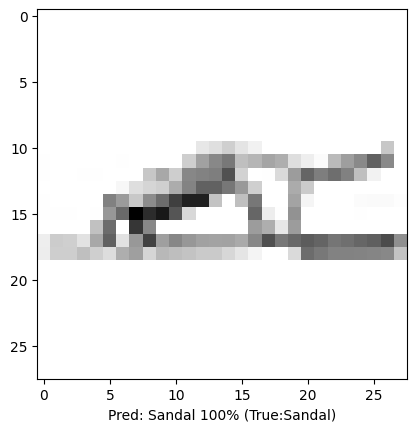

In [23]:
plot_random_image(model = model, images = X_test_norm, true_labels = y_test, classes = classes_names)